Read data


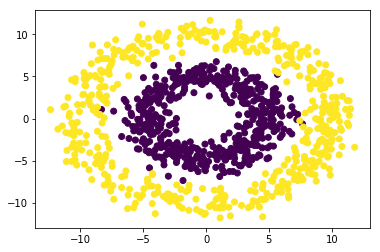

Fit
K 1
Train accuracy 1.0
Fit
K 2
Train accuracy 1.0
Fit
K 3
Train accuracy 0.991
Fit
K 4
Train accuracy 0.997


In [5]:
import numpy as np
from get_data import xor_data
from get_data import donut_data
from get_data import fig_data
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


class KNN(object):
    
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,Y):
        self.X=X
        self.Y=Y
        
    def predict(self,X):
        
        Y_pred=np.zeros(len(X))

        dist_list=[]
        y_list=[]
        K_list=[]

        for i,x in enumerate(X):   #pick a point loop over all domain for distances

            for j,xt in enumerate(self.X):
                dis=np.dot((x-xt),(x-xt))
                dist_list.append(dis)
                y_list.append(self.Y[j])

            zipped=zip(dist_list,y_list)  
            zipped_sorted=sorted(zipped, key=lambda xx: xx[0])

            for ii in range(self.k):
                K_list.append(int(zipped_sorted[ii][1]))

            max_count=0
            for iii in K_list:

                if(K_list.count(iii)>max_count):      #this way if there is multiple with same count, you get the first occurance 
                    max_count=K_list.count(iii)
                    max_int=iii

            Y_pred[i]=max_int
            dist_list=[]
            y_list=[]
            K_list=[]
        return Y_pred

    def accuracy(self,X,Y):
        YP=self.predict(X)
        return np.mean(YP==Y)


if __name__=='__main__':
    
    acc_vec=[]
    acc_vec2=[]
    
    print('Read data')
    #Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=2000,ratio=0.5)
    Xtrain,Ytrain=donut_data()
    plt.scatter(Xtrain[:,0],Xtrain[:,1],c=Ytrain)
    plt.show()
    
    for k in range(1,5):
        knn=KNN(k)     #model=KNN(k)    #model.fit() , model.score()
        knn.fit(Xtrain,Ytrain)
        print('Fit')
        print('K',k)
        print('Train accuracy',knn.accuracy(Xtrain,Ytrain))
        #print('Test accuracy',knn.accuracy(Xtest,Ytest))
        acc_vec.append(knn.accuracy(Xtrain,Ytrain))
        #acc_vec2.append(knn.accuracy(Xtest,Ytest))
    

    
    

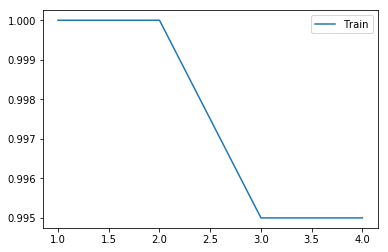

In [4]:
plt.plot(np.array(range(1,5)),acc_vec,label='Train')
#plt.plot(np.array(range(1,25)),acc_vec2,label='Test')
plt.legend()

In [2]:
Xtrain,Ytrain=donut_data()

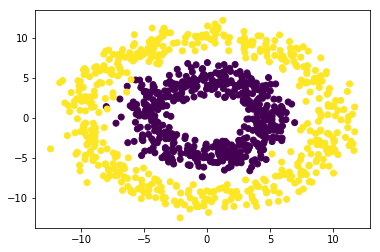

In [4]:
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=Ytrain)
plt.show()

Read data


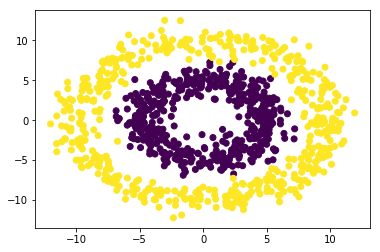

Fit
K 1
Train accuracy 1.0


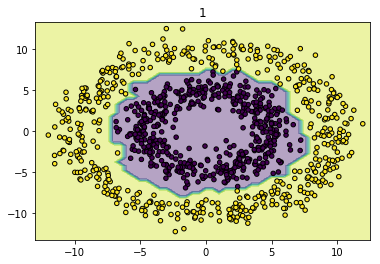

Fit
K 2
Train accuracy 1.0


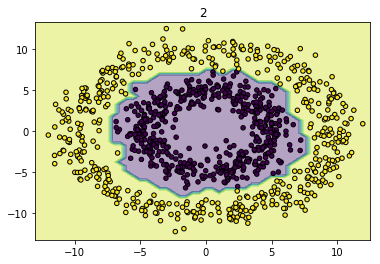

Fit
K 3
Train accuracy 0.998


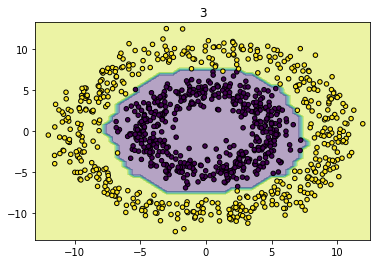

Fit
K 4
Train accuracy 0.998


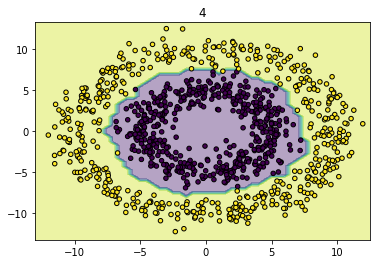

In [14]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets


acc_vec=[]
acc_vec2=[]

print('Read data')
#Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=2000,ratio=0.5)
Xtrain,Ytrain=donut_data()
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=Ytrain)
plt.show()

X=Xtrain
y=Ytrain

for k in range(1,5):
    knn=KNN(k)     #model=KNN(k)    #model.fit() , model.score()
    knn.fit(Xtrain,Ytrain)
    print('Fit')
    print('K',k)
    print('Train accuracy',knn.accuracy(Xtrain,Ytrain))
    #print('Test accuracy',knn.accuracy(Xtest,Ytest))
    acc_vec.append(knn.accuracy(Xtrain,Ytrain))
    #acc_vec2.append(knn.accuracy(Xtest,Ytest))
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),np.arange(y_min, y_max, 0.5))
    #f, axarr = plt.plot(1, 1, sharex='col', sharey='row', figsize=(10, 8))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
    plt.title(k)
    plt.show()
#    for idx, clf, tt in zip(product([0], [0]),[knn],['KNN=4']):
        
#        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#        Z = Z.reshape(xx.shape)

#        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
#        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
#        axarr[idx[0], idx[1]].set_title(tt)